In [ ]:
import matplotlib.pyplot as plt
import os
import glob
from skimage import io, color
import numpy as np
import pandas as pd
from scipy.stats import kurtosis
from scipy.stats import skew
from scipy.stats import entropy
import cv2
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, callbacks
import PIL
import skimage
import seaborn as sns

In [ ]:
from sklearn.metrics import precision_score

In [ ]:
df=pd.read_csv("case_study_devdata.csv")
df.head()

,primary_key,transaction_amount,merchant_name,merchant_country,target_variable,Merchant_category,revolve_interest_rate,credit_limit,Agri_1m,Contract_1m,...,Bureau_sec_amt_live,Bureau_all_amt_live,avg_sa_balance_1m,avg_sa_balance_3m,avg_sa_balance_6m,avg_sa_balance_12m,pctchg_curr_sa_bal_avg_sa_bal_1m,pctchg_curr_sa_bal_avg_sa_bal_3m,pctchg_curr_sa_bal_avg_sa_bal_6m,product
0,49099894,51079.86,MARRIOTT SURAT,IN,0,Hotels,9.0,288000.0,0,0,...,NaN,3500000.0,38758.46000,64367.36941,113262.3533,160922.63220,-0.168474,-0.597603,-0.445636,Affluent_Card
1,45954931,10118.00,DABWALI PETRO,IN,0,Fuel,36.0,25000.0,0,0,...,NaN,NaN,20184.79741,28980.68882,33703.9227,56910.01842,-0.257190,-0.241639,-0.699671,Mass_Card
2,44992070,4378.00,CIRCUIT SYSTEMS INDIA,IN,0,Retail,22.0,97000.0,0,0,...,NaN,51863.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mass_Card
3,44823072,6337.00,CIRCUIT SYSTEMS INDIA,IN,0,Retail,22.0,97000.0,0,0,...,NaN,51863.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mass_Card
4,49088796,54934.04,PAYPAL *JIEDUOBANGK,HK,0,Retail,22.0,97000.0,0,0,...,NaN,51863.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mass_Card


In [ ]:
df.describe()

,primary_key,transaction_amount,target_variable,revolve_interest_rate,credit_limit,Agri_1m,Contract_1m,Airline_1m,transport_1m,Insurance_1m,...,Bureau_unsec_amt_live,Bureau_sec_amt_live,Bureau_all_amt_live,avg_sa_balance_1m,avg_sa_balance_3m,avg_sa_balance_6m,avg_sa_balance_12m,pctchg_curr_sa_bal_avg_sa_bal_1m,pctchg_curr_sa_bal_avg_sa_bal_3m,pctchg_curr_sa_bal_avg_sa_bal_6m
count,5.993000e+03,5993.000000,5993.000000,5993.000000,5.992000e+03,5993.0,5993.000000,5993.000000,5993.000000,5993.000000,...,1.735000e+03,1.173000e+03,4.397000e+03,5.622000e+03,5.622000e+03,5.622000e+03,5.622000e+03,5330.000000,5304.000000,5.156000e+03
mean,4.584191e+07,14044.201680,0.046554,25.226010,2.188670e+05,0.0,0.005340,0.112631,0.455198,0.300184,...,3.724362e+06,1.132724e+07,5.327210e+06,4.532073e+05,4.526587e+05,4.599573e+05,5.194563e+05,7.560598,256.643568,5.066084e+02
std,1.888537e+06,25715.112464,0.210700,8.701603,2.499482e+05,0.0,0.087455,1.273050,2.018862,3.214229,...,3.285535e+07,6.024554e+07,5.292745e+07,2.625801e+06,2.437669e+06,2.505873e+06,3.247974e+06,400.460680,8742.193600,2.143983e+04
min,4.305350e+07,2500.000000,0.000000,9.000000,2.500000e+04,0.0,0.000000,0.000000,0.000000,0.000000,...,2.000000e+00,2.704800e+04,2.570000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.000000,-1.000000,-1.000000e+00
25%,4.431394e+07,3630.000000,0.000000,20.000000,6.700000e+04,0.0,0.000000,0.000000,0.000000,0.000000,...,1.100000e+05,2.000000e+06,1.833670e+05,4.906093e+03,7.242075e+03,9.502181e+03,1.065539e+04,-0.358601,-0.418316,-5.123950e-01
50%,4.552841e+07,5734.000000,0.000000,24.000000,1.310000e+05,0.0,0.000000,0.000000,0.000000,0.000000,...,4.000000e+05,3.600000e+06,7.051180e+05,3.139536e+04,3.785504e+04,4.265171e+04,5.346470e+04,-0.006471,-0.035006,-6.394659e-02
75%,4.755368e+07,13042.100000,0.000000,34.000000,3.000000e+05,0.0,0.000000,0.000000,0.000000,0.000000,...,1.004999e+06,6.337000e+06,2.744240e+06,1.815344e+05,2.035786e+05,2.279354e+05,2.731890e+05,0.253152,0.390686,5.008539e-01
max,4.917089e+07,450000.000000,1.000000,36.000000,1.500000e+06,0.0,2.000000,27.000000,32.000000,108.000000,...,5.340000e+08,8.980000e+08,1.490000e+09,7.690000e+07,5.370000e+07,5.620000e+07,1.070000e+08,29116.074070,457134.117600,1.072938e+06


In [ ]:
dfd=df

In [ ]:
dfd.head()

,primary_key,transaction_amount,merchant_name,merchant_country,target_variable,Merchant_category,revolve_interest_rate,credit_limit,Agri_1m,Contract_1m,...,Bureau_sec_amt_live,Bureau_all_amt_live,avg_sa_balance_1m,avg_sa_balance_3m,avg_sa_balance_6m,avg_sa_balance_12m,pctchg_curr_sa_bal_avg_sa_bal_1m,pctchg_curr_sa_bal_avg_sa_bal_3m,pctchg_curr_sa_bal_avg_sa_bal_6m,product
0,49099894,51079.86,MARRIOTT SURAT,IN,0,Hotels,9.0,288000.0,0,0,...,NaN,3500000.0,38758.46000,64367.36941,113262.3533,160922.63220,-0.168474,-0.597603,-0.445636,Affluent_Card
1,45954931,10118.00,DABWALI PETRO,IN,0,Fuel,36.0,25000.0,0,0,...,NaN,NaN,20184.79741,28980.68882,33703.9227,56910.01842,-0.257190,-0.241639,-0.699671,Mass_Card
2,44992070,4378.00,CIRCUIT SYSTEMS INDIA,IN,0,Retail,22.0,97000.0,0,0,...,NaN,51863.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mass_Card
3,44823072,6337.00,CIRCUIT SYSTEMS INDIA,IN,0,Retail,22.0,97000.0,0,0,...,NaN,51863.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mass_Card
4,49088796,54934.04,PAYPAL *JIEDUOBANGK,HK,0,Retail,22.0,97000.0,0,0,...,NaN,51863.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mass_Card


In [ ]:
dfd.drop('merchant_name',axis=1,inplace=True)
dfd.drop('merchant_country',axis=1,inplace=True)

In [ ]:
dfd.head()

,primary_key,transaction_amount,target_variable,Merchant_category,revolve_interest_rate,credit_limit,Agri_1m,Contract_1m,Airline_1m,transport_1m,...,Bureau_sec_amt_live,Bureau_all_amt_live,avg_sa_balance_1m,avg_sa_balance_3m,avg_sa_balance_6m,avg_sa_balance_12m,pctchg_curr_sa_bal_avg_sa_bal_1m,pctchg_curr_sa_bal_avg_sa_bal_3m,pctchg_curr_sa_bal_avg_sa_bal_6m,product
0,49099894,51079.86,0,Hotels,9.0,288000.0,0,0,0,1,...,NaN,3500000.0,38758.46000,64367.36941,113262.3533,160922.63220,-0.168474,-0.597603,-0.445636,Affluent_Card
1,45954931,10118.00,0,Fuel,36.0,25000.0,0,0,0,0,...,NaN,NaN,20184.79741,28980.68882,33703.9227,56910.01842,-0.257190,-0.241639,-0.699671,Mass_Card
2,44992070,4378.00,0,Retail,22.0,97000.0,0,0,0,0,...,NaN,51863.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mass_Card
3,44823072,6337.00,0,Retail,22.0,97000.0,0,0,0,0,...,NaN,51863.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mass_Card
4,49088796,54934.04,0,Retail,22.0,97000.0,0,0,0,0,...,NaN,51863.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mass_Card


In [ ]:
y=dfd['target_variable']

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
dfden = pd.get_dummies(df, columns = ['Merchant_category','product'])

In [ ]:
dfden.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5993 entries, 0 to 5992
Columns: 377 entries, primary_key to product_Youth_Card
dtypes: float64(183), int64(160), uint8(34)
memory usage: 15.9 MB


In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [ ]:
df_n = dfden

In [ ]:
df_n.head()

,primary_key,transaction_amount,target_variable,revolve_interest_rate,credit_limit,Agri_1m,Contract_1m,Airline_1m,transport_1m,Insurance_1m,...,Merchant_category_Rent Payments,Merchant_category_Restaurants,Merchant_category_Retail,Merchant_category_Transportation services,Merchant_category_Utility,Merchant_category_Wallet load,product_Affluent_Card,product_HNI_Card,product_Mass_Card,product_Youth_Card
0,49099894,51079.86,0,9.0,288000.0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,45954931,10118.00,0,36.0,25000.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,44992070,4378.00,0,22.0,97000.0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
3,44823072,6337.00,0,22.0,97000.0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
4,49088796,54934.04,0,22.0,97000.0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
df_n.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5993 entries, 0 to 5992
Columns: 377 entries, primary_key to product_Youth_Card
dtypes: float64(183), int64(160), uint8(34)
memory usage: 15.9 MB


In [ ]:
df_n.drop('Bureau_CV_amt_live',axis=1,inplace=True)
df_n.drop('Bureau_UC_amt_live',axis=1,inplace=True)
df_n.drop('Bureau_CV_amt_ever',axis=1,inplace=True)
df_n.drop('Bureau_EL_amt_live',axis=1,inplace=True)
df_n.drop('Bureau_UC_amt_ever',axis=1,inplace=True)
df_n.drop('Bureau_GL_amt_live',axis=1,inplace=True)
df_n.drop('Bureau_TW_amt_live',axis=1,inplace=True)
df_n.drop('Bureau_LAP_amt_live',axis=1,inplace=True)
df_n.drop('Bureau_BL_amt_ever',axis=1,inplace=True)
df_n.drop('Bureau_GL_amt_ever',axis=1,inplace=True)
df_n.drop('Bureau_AL_amt_live',axis=1,inplace=True)
df_n.drop('Bureau_TW_amt_ever',axis=1,inplace=True)
df_n.drop('Bureau_HL_amt_live',axis=1,inplace=True)
df_n.drop('target_variable',axis=1,inplace=True)
df_n.drop('primary_key',axis=1,inplace=True)

In [ ]:
columns_with_missing_values = df_n.columns[df_n.isna().any()].tolist()
columns_with_missing_values

['credit_limit',
 'revolve_1m',
 'revolve_3m',
 'revolve_6m',
 'util_1m',
 'util_3m',
 'util_6m',
 'payment_ratio_1m',
 'payment_ratio_3m',
 'payment_ratio_6m',
 'paymad_1m',
 'paymad_3m',
 'paymad_6m',
 'has_taken_emi_before',
 'count_of_emi_before',
 'Bureau_AL_amt_ever',
 'Bureau_CCOD_amt_ever',
 'Bureau_CD_amt_ever',
 'Bureau_EL_amt_ever',
 'Bureau_HL_amt_ever',
 'Bureau_PL_amt_ever',
 'Bureau_LAP_amt_ever',
 'Bureau_unsec_amt_ever',
 'Bureau_sec_amt_ever',
 'Bureau_all_amt_ever',
 'Bureau_BL_amt_live',
 'Bureau_CCOD_amt_live',
 'Bureau_CD_amt_live',
 'Bureau_PL_amt_live',
 'Bureau_unsec_amt_live',
 'Bureau_sec_amt_live',
 'Bureau_all_amt_live',
 'avg_sa_balance_1m',
 'avg_sa_balance_3m',
 'avg_sa_balance_6m',
 'avg_sa_balance_12m',
 'pctchg_curr_sa_bal_avg_sa_bal_1m',
 'pctchg_curr_sa_bal_avg_sa_bal_3m',
 'pctchg_curr_sa_bal_avg_sa_bal_6m']

In [ ]:
columns_mean = ['credit_limit','paymad_1m','paymad_3m','paymad_6m','payment_ratio_1m','pctchg_curr_sa_bal_avg_sa_bal_6m','payment_ratio_3m','payment_ratio_6m','pctchg_curr_sa_bal_avg_sa_bal_1m','pctchg_curr_sa_bal_avg_sa_bal_3m','util_1m','util_3m','util_6m']

In [ ]:
for col in columns_mean:
# Calculate mean and standard deviation
    mean = df_n[col].mean()
    std = df_n[col].std()

    # Identify outliers using a threshold value
    threshold = 3 * std
    df_n['outlier'] = abs(df_n[col] - mean) > threshold

    # Replace missing values with mean excluding outliers
    df_n.loc[df_n['outlier'] == False, col] = df_n.loc[df_n['outlier'] == False, col].fillna(mean)

In [ ]:
more_cols = ['avg_sa_balance_1m','avg_sa_balance_3m','avg_sa_balance_6m','avg_sa_balance_12m']

In [ ]:
for col in more_cols:
# Calculate mean and standard deviation
    mean = df_n[col].mean()
    std = df_n[col].std()

    # Identify outliers using a threshold value
    threshold = 3 * std
    df_n['outlier'] = abs(df_n[col] - mean) > threshold

    # Replace missing values with mean excluding outliers
    df_n.loc[df_n['outlier'] == False, col] = df_n.loc[df_n['outlier'] == False, col].fillna(mean)

In [ ]:
columns_with_missing_values = df_n.columns[df_n.isna().any()].tolist()
columns_with_missing_values

['revolve_1m',
 'revolve_3m',
 'revolve_6m',
 'has_taken_emi_before',
 'count_of_emi_before',
 'Bureau_AL_amt_ever',
 'Bureau_CCOD_amt_ever',
 'Bureau_CD_amt_ever',
 'Bureau_EL_amt_ever',
 'Bureau_HL_amt_ever',
 'Bureau_PL_amt_ever',
 'Bureau_LAP_amt_ever',
 'Bureau_unsec_amt_ever',
 'Bureau_sec_amt_ever',
 'Bureau_all_amt_ever',
 'Bureau_BL_amt_live',
 'Bureau_CCOD_amt_live',
 'Bureau_CD_amt_live',
 'Bureau_PL_amt_live',
 'Bureau_unsec_amt_live',
 'Bureau_sec_amt_live',
 'Bureau_all_amt_live']

In [ ]:
df_n=df_n.fillna(0)

In [ ]:
df_n.isnull().values.any()

False

In [ ]:
df_n.head(5)

,transaction_amount,revolve_interest_rate,credit_limit,Agri_1m,Contract_1m,Airline_1m,transport_1m,Insurance_1m,Hotels_1m,Railways_1m,...,Merchant_category_Restaurants,Merchant_category_Retail,Merchant_category_Transportation services,Merchant_category_Utility,Merchant_category_Wallet load,product_Affluent_Card,product_HNI_Card,product_Mass_Card,product_Youth_Card,outlier
0,51079.86,9.0,288000.0,0,0,0,1,0,6,0,...,0,0,0,0,0,1,0,0,0,False
1,10118.00,36.0,25000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,False
2,4378.00,22.0,97000.0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,False
3,6337.00,22.0,97000.0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,False
4,54934.04,22.0,97000.0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,False


In [ ]:
df_n.drop('outlier',axis=1,inplace=True)

In [ ]:
df_n.head(5)

,transaction_amount,revolve_interest_rate,credit_limit,Agri_1m,Contract_1m,Airline_1m,transport_1m,Insurance_1m,Hotels_1m,Railways_1m,...,Merchant_category_Rent Payments,Merchant_category_Restaurants,Merchant_category_Retail,Merchant_category_Transportation services,Merchant_category_Utility,Merchant_category_Wallet load,product_Affluent_Card,product_HNI_Card,product_Mass_Card,product_Youth_Card
0,51079.86,9.0,288000.0,0,0,0,1,0,6,0,...,0,0,0,0,0,0,1,0,0,0
1,10118.00,36.0,25000.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,4378.00,22.0,97000.0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,6337.00,22.0,97000.0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,54934.04,22.0,97000.0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(df_n,y, test_size=0.30,
                                                    random_state=101)

In [ ]:
y_train

2911    1
1707    0
3408    0
2922    1
1183    0
       ..
599     0
5695    0
1361    0
1547    1
4959    0
Name: target_variable, Length: 4195, dtype: int64

In [ ]:
pipe = make_pipeline(LogisticRegression(max_iter=1000))

#fitting data into the model
pipe.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('logisticregression', LogisticRegression(max_iter=1000))])

In [ ]:
# predicting values
y_pred = pipe.predict(X_test)

# calculating accuracy score
accuracy_score = accuracy_score(y_pred,y_test)
print('accuracy score : ',accuracy_score)

accuracy score :  0.9538375973303671


In [ ]:
precision_score(y_pred,y_test)

0.07407407407407407

In [ ]:
from sklearn.metrics import recall_score

In [ ]:
recall_score(y_pred,y_test)

0.42857142857142855

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
f1_score(y_pred,y_test)

0.12631578947368421

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
adb = AdaBoostClassifier()
adb_model = adb.fit(X_train,y_train)

In [ ]:
adb_model.score(X_test,y_test)

0.9521690767519466

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
import xgboost as xgb
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

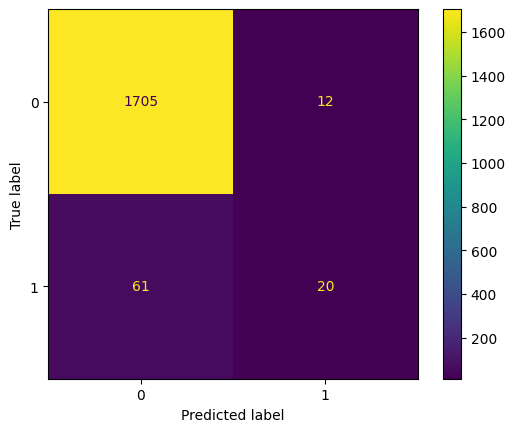

In [ ]:
my_model = xgb.XGBClassifier()
my_model.fit(X_train, y_train)

# Predicting the Test set results
y_pred = my_model.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
print("The accuracy of the model on validation set is", my_model.score(X_test,y_test))

The accuracy of the model on validation set is 0.9593993325917687


In [ ]:
from sklearn.metrics import confusion_matrix
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay

0.9482758620689655

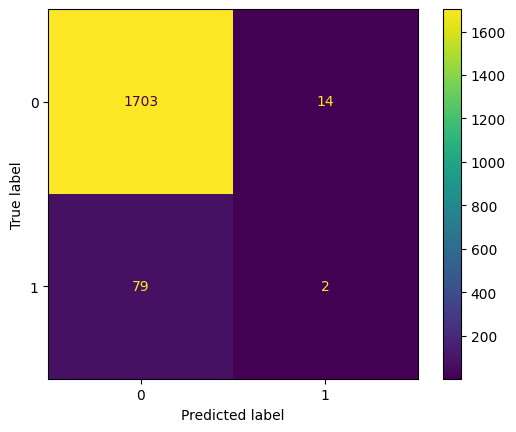

In [ ]:
## Import the Classifier.
from sklearn.neighbors import KNeighborsClassifier
## Instantiate the model with 5 neighbors.
knn = KNeighborsClassifier(n_neighbors=5)
## Fit the model on the training data.
knn.fit(X_train, y_train)
## See how the model performs on the test data.
y_pred = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();
knn.score(X_test, y_test)

###Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9549499443826474


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [ ]:
input_shape = [X_train.shape[1]]

In [ ]:
model = keras.models.Sequential()

model.add(tf.keras.layers.BatchNormalization(input_shape = input_shape))

model.add(tf.keras.layers.Dense(32,activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(16,activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(8,activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Dense(1,activation = 'sigmoid'))

In [ ]:
type(X_train)

pandas.core.frame.DataFrame

In [ ]:
type(y_train)

pandas.core.series.Series

In [ ]:
X = np.asarray(X_train.values).astype(np.float32)
Y = np.asarray(y_train.values).astype(np.float32)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),loss="binary_crossentropy",metrics=['accuracy'])
model.fit(X,Y,batch_size = 20,epochs = 50)

Epoch 1/50
210/210 [==============================] - 4s 4ms/step - loss: 0.6356 - accuracy: 0.6720
Epoch 2/50
210/210 [==============================] - 1s 4ms/step - loss: 0.3323 - accuracy: 0.9082
Epoch 3/50
210/210 [==============================] - 1s 3ms/step - loss: 0.2339 - accuracy: 0.9435
Epoch 4/50
210/210 [==============================] - 1s 3ms/step - loss: 0.1976 - accuracy: 0.9502
Epoch 5/50
210/210 [==============================] - 1s 3ms/step - loss: 0.1840 - accuracy: 0.9504
Epoch 6/50
210/210 [==============================] - 1s 4ms/step - loss: 0.1810 - accuracy: 0.9518
Epoch 7/50
210/210 [==============================] - 1s 3ms/step - loss: 0.1760 - accuracy: 0.9521
Epoch 8/50
210/210 [==============================] - 1s 3ms/step - loss: 0.1730 - accuracy: 0.9511
Epoch 9/50
210/210 [==============================] - 1s 3ms/step - loss: 0.1648 - accuracy: 0.9516
Epoch 10/50
210/210 [==============================] - 1s 3ms/step - loss: 0.1657 - accuracy: 0.9538

In [ ]:
from sklearn.metrics import confusion_matrix
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

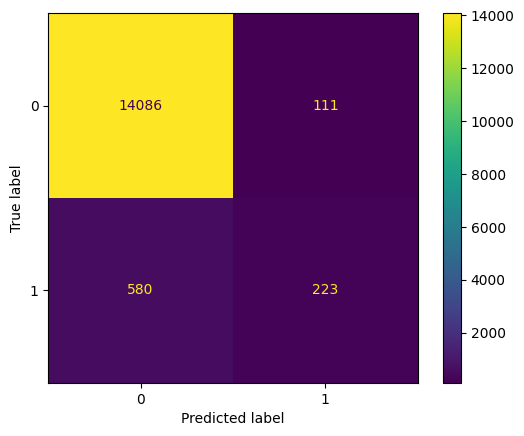

In [ ]:
# Fitting XGBoost to the training data
my_model = xgb.XGBClassifier()
my_model.fit(X_train, y_train)

# Predicting the Test set results
y_pred = my_model.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [ ]:
print("The accuracy of the model on validation set is", my_model.score(X_test,y_test))

The accuracy of the model on validation set is 0.9539333333333333


0.9432666666666667

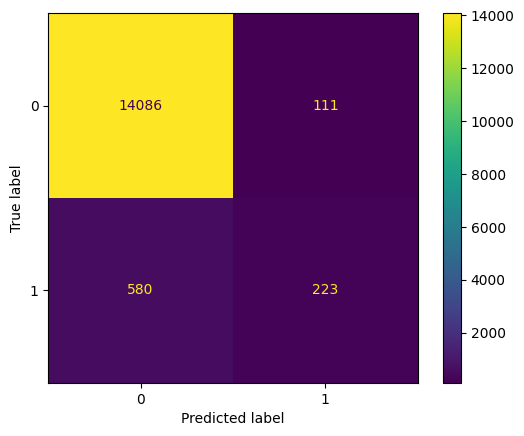

In [ ]:
## Import the Classifier.
from sklearn.neighbors import KNeighborsClassifier
## Instantiate the model with 5 neighbors.
knn = KNeighborsClassifier(n_neighbors=5)
## Fit the model on the training data.
knn.fit(X_train, y_train)
## See how the model performs on the test data.
y_pred = my_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();
knn.score(X_test, y_test)

In [ ]:
df2=pd.read_csv("case_study_validation.csv")

In [ ]:
df2.head(5)

,primary_key,transaction_amount,merchant_name,merchant_country,Merchant_category,revolve_interest_rate,credit_limit,Agri_1m,Contract_1m,Airline_1m,...,Bureau_sec_amt_live,Bureau_all_amt_live,avg_sa_balance_1m,avg_sa_balance_3m,avg_sa_balance_6m,avg_sa_balance_12m,pctchg_curr_sa_bal_avg_sa_bal_1m,pctchg_curr_sa_bal_avg_sa_bal_3m,pctchg_curr_sa_bal_avg_sa_bal_6m,product
0,43231676,88258.14,MARRLOTT SURAT,IN,Hotels,9.0,288000.0,0,0,0,...,NaN,3500000.0,38758.46000,64367.36941,113262.35330,160922.63220,-0.168474,-0.597603,-0.445636,Affluent_Card
1,44150123,8891.30,TEXAS INSTRUMENTS,IN,Retail,22.0,97000.0,0,0,0,...,NaN,51863.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mass_Card
2,48126804,60000.00,ADITYA BIRLA SUN LIFE,IN,Insurance,22.0,97000.0,0,0,0,...,NaN,51863.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mass_Card
3,44577506,3499.00,ROBU,IN,Retail,22.0,97000.0,0,0,0,...,NaN,51863.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mass_Card
4,45463164,21358.00,RAZ*ICICI LOMBARD GIC L,IN,Insurance,24.0,25000.0,0,0,0,...,NaN,NaN,36872.31704,72868.28894,41375.09517,24675.82751,0.498606,5.450048,3.588329,Mass_Card


In [ ]:
# columns_with_missing_values = df2.columns[df2.isna().any()].tolist()
# columns_with_missing_values

In [ ]:
null_counts = df2.isnull().sum()
null_counts_sorted = null_counts.sort_values(ascending=False)
print(null_counts_sorted[null_counts_sorted>0])

Bureau_CV_amt_live                  20813
Bureau_UC_amt_live                  20714
Bureau_CV_amt_ever                  20684
Bureau_EL_amt_live                  20661
Bureau_UC_amt_ever                  20433
Bureau_GL_amt_live                  20374
Bureau_TW_amt_live                  20100
Bureau_BL_amt_live                  20051
Bureau_LAP_amt_live                 20038
Bureau_EL_amt_ever                  19943
Bureau_LAP_amt_ever                 19588
Bureau_BL_amt_ever                  19297
Bureau_GL_amt_ever                  19129
Bureau_AL_amt_live                  18871
Bureau_TW_amt_ever                  17952
Bureau_HL_amt_live                  17357
Bureau_sec_amt_live                 16736
has_taken_emi_before                16731
count_of_emi_before                 16731
Bureau_CD_amt_live                  16468
Bureau_AL_amt_ever                  16334
Bureau_PL_amt_live                  15977
Bureau_HL_amt_ever                  15534
Bureau_unsec_amt_live             

In [ ]:
df2.drop('merchant_name',axis=1,inplace=True)
df2.drop('merchant_country',axis=1,inplace=True)

In [ ]:
df2['product'] = df2['product'].fillna('Youth_Card')

In [ ]:
dfen2 = pd.get_dummies(df2, columns = ['Merchant_category','product'])

In [ ]:
df_n = dfen2

In [ ]:
df_n.drop('Bureau_CV_amt_live',axis=1,inplace=True)
df_n.drop('Bureau_UC_amt_live',axis=1,inplace=True)
df_n.drop('Bureau_CV_amt_ever',axis=1,inplace=True)
df_n.drop('Bureau_EL_amt_live',axis=1,inplace=True)
df_n.drop('Bureau_UC_amt_ever',axis=1,inplace=True)
df_n.drop('Bureau_GL_amt_live',axis=1,inplace=True)
df_n.drop('Bureau_TW_amt_live',axis=1,inplace=True)
df_n.drop('Bureau_LAP_amt_live',axis=1,inplace=True)
df_n.drop('Bureau_BL_amt_ever',axis=1,inplace=True)
df_n.drop('Bureau_GL_amt_ever',axis=1,inplace=True)
df_n.drop('Bureau_AL_amt_live',axis=1,inplace=True)
df_n.drop('Bureau_TW_amt_ever',axis=1,inplace=True)
df_n.drop('Bureau_HL_amt_live',axis=1,inplace=True)
df_n.drop('primary_key',axis=1,inplace=True)

In [ ]:
columns_mean = ['credit_limit','paymad_1m','paymad_3m','paymad_6m','payment_ratio_1m','pctchg_curr_sa_bal_avg_sa_bal_6m','payment_ratio_3m','payment_ratio_6m','pctchg_curr_sa_bal_avg_sa_bal_1m','pctchg_curr_sa_bal_avg_sa_bal_3m','util_1m','util_3m','util_6m']

In [ ]:
for col in columns_mean:
# Calculate mean and standard deviation
    mean = df_n[col].mean()
    std = df_n[col].std()

    # Identify outliers using a threshold value
    threshold = 3 * std
    df_n['outlier'] = abs(df_n[col] - mean) > threshold

    # Replace missing values with mean excluding outliers
    df_n.loc[df_n['outlier'] == False, col] = df_n.loc[df_n['outlier'] == False, col].fillna(mean)

In [ ]:
more_cols = ['avg_sa_balance_1m','avg_sa_balance_3m','avg_sa_balance_6m','avg_sa_balance_12m']

In [ ]:
for col in more_cols:
# Calculate mean and standard deviation
    mean = df_n[col].mean()
    std = df_n[col].std()

    # Identify outliers using a threshold value
    threshold = 3 * std
    df_n['outlier'] = abs(df_n[col] - mean) > threshold

    # Replace missing values with mean excluding outliers
    df_n.loc[df_n['outlier'] == False, col] = df_n.loc[df_n['outlier'] == False, col].fillna(mean)

In [ ]:
columns_with_missing_values = df_n.columns[df_n.isna().any()].tolist()
columns_with_missing_values

['revolve_1m',
 'revolve_3m',
 'revolve_6m',
 'has_taken_emi_before',
 'count_of_emi_before',
 'Bureau_AL_amt_ever',
 'Bureau_CCOD_amt_ever',
 'Bureau_CD_amt_ever',
 'Bureau_EL_amt_ever',
 'Bureau_HL_amt_ever',
 'Bureau_PL_amt_ever',
 'Bureau_LAP_amt_ever',
 'Bureau_unsec_amt_ever',
 'Bureau_sec_amt_ever',
 'Bureau_all_amt_ever',
 'Bureau_BL_amt_live',
 'Bureau_CCOD_amt_live',
 'Bureau_CD_amt_live',
 'Bureau_PL_amt_live',
 'Bureau_unsec_amt_live',
 'Bureau_sec_amt_live',
 'Bureau_all_amt_live']

In [ ]:
df_n=df_n.fillna(0)

In [ ]:
df_n.head(5)

,transaction_amount,revolve_interest_rate,credit_limit,Agri_1m,Contract_1m,Airline_1m,transport_1m,Insurance_1m,Hotels_1m,Railways_1m,...,Merchant_category_Restaurants,Merchant_category_Retail,Merchant_category_Transportation services,Merchant_category_Utility,Merchant_category_Wallet load,product_Affluent_Card,product_HNI_Card,product_Mass_Card,product_Youth_Card,outlier
0,88258.14,9.0,288000.0,0,0,0,1,0,6,0,...,0,0,0,0,0,1,0,0,0,False
1,8891.30,22.0,97000.0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,False
2,60000.00,22.0,97000.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,False
3,3499.00,22.0,97000.0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,False
4,21358.00,24.0,25000.0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,1,0,False


In [ ]:
df_n.isnull().values.any()

False

In [ ]:
df_n.shape

(21005, 364)

In [ ]:
y_pred = my_model.predict_proba(df_n)

ValueError: ignored

In [ ]:
y_pred=y_pred[:,1]

In [ ]:
dfen2['probability']=y_pred

In [ ]:
dfen2.head()

,primary_key,transaction_amount,revolve_interest_rate,credit_limit,Agri_1m,Contract_1m,Airline_1m,transport_1m,Insurance_1m,Hotels_1m,...,Merchant_category_Restaurants,Merchant_category_Retail,Merchant_category_Transportation services,Merchant_category_Utility,Merchant_category_Wallet load,product_Affluent_Card,product_HNI_Card,product_Mass_Card,product_Youth_Card,probability
0,43231676,88258.14,9.0,288000.0,0,0,0,1,0,6,...,0,0,0,0,0,1,0,0,0,0.000461
1,44150123,8891.30,22.0,97000.0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0.000354
2,48126804,60000.00,22.0,97000.0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0.000269
3,44577506,3499.00,22.0,97000.0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0.000327
4,45463164,21358.00,24.0,25000.0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,1,0,0.046243


In [ ]:
dfsub=dfen2[['primary_key','probability']]

In [ ]:
dfsub.head()

,primary_key,probability
0,43231676,0.000461
1,44150123,0.000354
2,48126804,0.000269
3,44577506,0.000327
4,45463164,0.046243


In [ ]:
dfsub.to_excel('new_Submission.xlsx',sheet_name='Sheet_name_1')

In [ ]:
dfen2['primary_key']